## 1-Importing Data And Initial Exploring

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# importing data and exploring
df = pd.read_csv('./student_scores.csv')
print(df.shape)
print(df.describe())
df.head()

(25, 2)
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


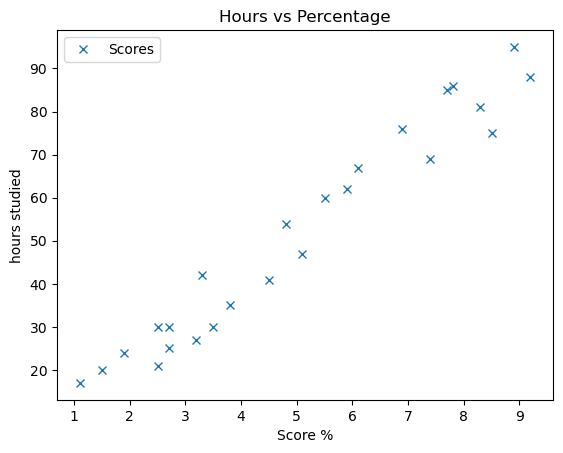

In [3]:
# Plotting variables and checking correlation
df.plot(
    x='Hours',
    y='Scores',
    style='x',
    xlabel='Score %',
    ylabel='hours studied',
    title='Hours vs Percentage'
)

print(df.corr())

> There is a strong positive correlation of 97.6% between the 2 variables

## 2- Creating Train and Test Dastasets

In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MSE

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

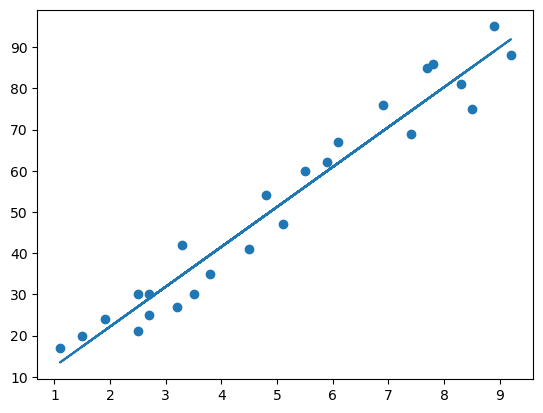

In [8]:
# ploting Regression line and test data

plt.scatter(X,y)
plt.plot(X, ((model.coef_ * X) + model.intercept_)) # y=mx+c

## 3-Predictions 

In [9]:
y_pred = model.predict(X_test)

In [10]:
pd.DataFrame({'Actual':y_test, 'predicted':y_pred})

,Actual,predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [11]:
MSE(y_test, y_pred)

3.9207511902099244

## 4- Predicting Score For 9.25 Hours

In [28]:
prediction = model.predict(np.array(9.25).reshape(1,-1))

print('for studying for 9.25 hours it is predicted to score: ' + str(round(*prediction,2)) + '%')

for studying for 9.25 hours it is predicted to score: 92.39%
